# Importação e instalação das bibliotecas

In [1]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

In [2]:
!python3 -m spacy download pt_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.2 MB 1.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


# Carregamento da base de dados

## Base Treinamento

 - Sentimento negativo: 0
 - Sentimento positivo: 1
 

In [3]:
base_treinamento = pd.read_csv('/content/Train50.csv', on_bad_lines='skip', encoding='utf-8', delimiter=';')

In [4]:
base_treinamento.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [5]:
base_treinamento.shape

(50000, 5)

In [6]:
base_treinamento.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


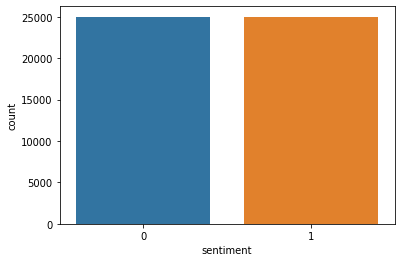

In [7]:
sns.countplot(base_treinamento['sentiment'], label='Contagem');

In [8]:
base_treinamento['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [9]:
base_treinamento['sentiment'].unique()

array([1, 0])

In [10]:
base_treinamento.isna().sum()

tweet_text    0
sentiment     0
dtype: int64

## Base de Teste

In [11]:
base_teste = pd.read_csv('/content/Test.csv', on_bad_lines='skip', encoding='utf-8', delimiter=';')

In [12]:
base_teste.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)


In [13]:
base_teste.shape

(5000, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


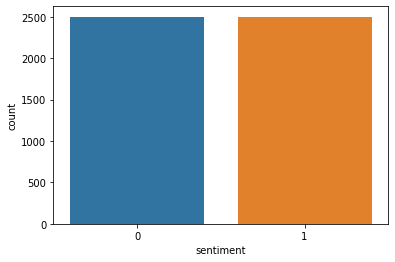

In [14]:
sns.countplot(base_teste['sentiment'], label='Contagem');

In [15]:
base_teste.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [16]:
base_teste['sentiment'].value_counts()

1    2500
0    2500
Name: sentiment, dtype: int64

In [17]:
base_teste.isna().sum()

tweet_text    0
sentiment     0
dtype: int64

# Função para pré-processamento dos textos

- Letras minúsculas
- Nome do usuário (@)
- URLs
- Espaços em branco
- Emoticons
- Stop words
- Lematização
- Pontuações

In [18]:
base_treinamento['tweet_text'][1]

'@behin_d_curtain Para mim, é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'

In [19]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS
print(stop_words)

{'aquele', 'demais', 'sob', 'assim', 'dentro', 'os', 'por', 'vão', 'em', 'sistema', 'se', 'onze', 'neste', 'questão', 'sexto', 'vinte', 'muito', 'vocês', 'enquanto', 'maior', 'minha', 'daquela', 'sem', 'pôde', 'fazer', 'grupo', 'novas', 'favor', 'estiveste', 'apoio', 'seu', 'estado', 'nenhuma', 'estivemos', 'nós', 'nossa', 'outros', 'novos', 'números', 'ou', 'nosso', 'ele', 'novo', 'obrigada', 'sei', 'puderam', 'meio', 'seus', 'posição', 'comprido', 'dezassete', 'dizem', 'grandes', 'vosso', 'tudo', 'ter', 'número', 'antes', 'nuns', 'sim', 'quê', 'te', 'embora', 'des', 'inclusive', 'põem', 'somente', 'eles', 'deve', 'tarde', 'zero', 'naquela', 'tempo', 'quinto', 'saber', 'vais', 'breve', 'seria', 'tal', 'seis', 'podem', 'põe', 'apenas', 'tive', 'disso', 'maiorias', 'que', 'ora', 'aos', 'você', 'final', 'valor', 'dá', 'isso', 'tiveste', 'área', 'máximo', 'cá', 'sois', 'veja', 'tu', 'as', 'esta', 'querem', 'pode', 'aí', 'desta', 'obrigado', 'nesse', 'vós', 'nove', 'tentei', 'diante', 'qua

In [21]:
len(stop_words)

413

In [22]:
pln = spacy.load('pt_core_news_sm')

In [23]:
from re import search
import re
def pre_processamento(texto):
  # Letras minusculas
  texto = texto.lower()
  
  # User Name
  texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto)

  # URLs
  texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)

  # Espaços em branco
  texto = re.sub(r" +", ' ', texto)

  # Emoticons
  lista_emocoes = {':)': 'emocaopositiva',
                  ':(': 'emocaonegativa',
                  ':d': 'emocaopositiva'}

  for emocao in lista_emocoes:
    texto = texto.replace(emocao, lista_emocoes[emocao])

  # Lematização
  documento = pln(texto)
  lista = []
  for token in documento:
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
  return lista

In [24]:
teste = pre_processamento('Estou aprendendo processamento 1 10 23 de linguagem natural, curso em Rio de Janeiro :D')
teste

'aprender processamento linguagem natural cursar rir janeiro emocaopositiva'

# Pré-processamento da base de dados

# Limpeza dos dados

In [25]:
base_treinamento.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


In [26]:
base_treinamento['tweet_text'] = base_treinamento['tweet_text'].apply(pre_processamento)

In [27]:
base_treinamento.head()

,tweet_text,sentiment
0,o pessoa certo parir seriar o valer e azeved...,1
1,parir mim precisamente o contrário emocaopos...,1
2,video hoje ... pensar falar sobrar o meter csg...,1
3,aaaaaaaa amar polaroids expressar o quantum to...,1
4,valorizar o coração menino vc diferente o sorr...,1


In [28]:
base_teste['tweet_text'] = base_teste['tweet_text'].apply(pre_processamento)

In [29]:
base_teste.head()

,tweet_text,sentiment
0,obrigar emocaopositiva,1
1,pa puta parir emocaopositiva,1
2,querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 conferir o l...,1
3,vcs ajudar galera pelar amor butera emocaoposi...,1
4,casar zé e o morrer sono chegar o casar e fica...,1


# Tratamento da classe

In [30]:
base_dados_treinamento_final = []
for texto, emocao in zip(base_treinamento['tweet_text'], base_treinamento['sentiment']):
  if emocao == 1:
    dic = ({'POSITIVO': True, 'NEGATIVO': False})
  elif emocao == 0:
    dic = ({'POSITIVO': False, 'NEGATIVO': True})

  base_dados_treinamento_final.append([texto, dic.copy()])

In [31]:
len(base_dados_treinamento_final)

50000

In [32]:
base_dados_treinamento_final[100][1]

{'NEGATIVO': False, 'POSITIVO': True}

# Criação do Classificador

In [33]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe('textcat')
categorias.add_label('POSITIVO')
categorias.add_label('NEGATIVO')
modelo.add_pipe(categorias)
historico = []

In [34]:
modelo.begin_training()
for epoca in range(5):
  random.shuffle(base_dados_treinamento_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_treinamento_final, 512):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos,annotations, losses=losses)
    historico.append(losses) 
  if epoca % 5 == 0:
    print(losses)
    

{'textcat': 1.1437924442719849e-05}


In [35]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [36]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.14379244e-05, 1.14379244e-05, 1.14379244e-05, 1.14379244e-05,
       1.14379244e-05, 1.14379244e-05, 1.14379244e-05, 1.14379244e-05,
       1.14379244e-05, 1.14379244e-05, 1.14379244e-05, 1.14379244e-05,
       1.14379244e-05, 1.14379244e-05, 1.14379244e-05, 1.14379244e-05,
       1.14379244e-05, 1.14379244e-05, 1.14379244e-05, 1.14379244e-05,
       1.14379244e-05, 1.14379244e-05, 1.14379244e-05, 1.14379244e-05,
       1.14379244e-05, 1.14379244e-05, 1.14379244e-05, 1.14379244e-05,
       1.14379244e-05, 1.14379244e-05, 1.14379244e-05, 1.14379244e-05,
       1.14379244e-05, 1.14379244e-05, 1.14379244e-05, 1.14379244e-05,
       1.14379244e-05, 1.14379244e-05, 1.14379244e-05, 1.14379244e-05,
       1.14379244e-05, 1.14379244e-05, 1.14379244e-05, 1.14379244e-05,
       1.14379244e-05, 1.14379244e-05, 1.14379244e-05, 1.14379244e-05,
       1.14379244e-05, 1.14379244e-05, 1.14379244e-05, 1.14379244e-05,
       1.14379244e-05, 1.14379244e-05, 1.14379244e-05, 1.14379244e-05,
      

Text(0, 0.5, 'Erro')

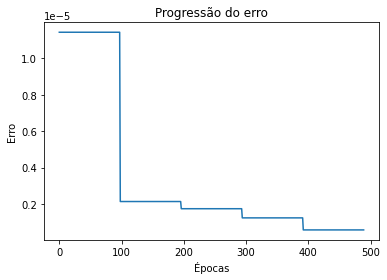

In [37]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')


In [38]:
modelo.to_disk("modelo")

# Testes com uma frase

In [39]:
modelo_carregado = spacy.load('modelo')

In [40]:
modelo_carregado

In [41]:
texto_positivo = 'eu comprei um presente para a minha irmã'
texto_positivo = pre_processamento(texto_positivo)
texto_positivo

'comprar presentar parir o irmão'

In [42]:
previsao = modelo_carregado(texto_positivo)
previsao

comprar presentar parir o irmão

In [43]:
previsao.cats

{'NEGATIVO': 0.004354037344455719, 'POSITIVO': 0.9831593036651611}

# Avaliação do Modelo

In [44]:
previsoes = []
for texto in base_teste['tweet_text']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [45]:
previsoes[1]

{'NEGATIVO': 9.528488590149209e-05, 'POSITIVO': 0.9999545812606812}

In [46]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [47]:
previsoes_final

array([1, 1, 1, ..., 0, 0, 0])

In [48]:
respostas_reais = base_teste['sentiment'].values
respostas_reais

array([1, 1, 1, ..., 0, 0, 0])

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [50]:
accuracy_score(respostas_reais, previsoes_final)

0.9962

In [51]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[2494,    6],
       [  13, 2487]])

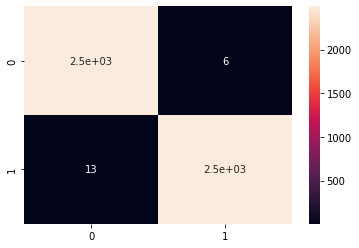

In [52]:
sns.heatmap(cm, annot=True)